In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt 
import scipy.stats as stt

In [76]:
config_no = 1
take_no = 1
ax_no = 'blue'
tmp_data = np.load(f"../data/norm_mode_null_test/NullTest_config{config_no}-{ax_no}-take{take_no}.npy")[500:]

In [77]:
hit_ind = np.argmax(np.abs(tmp_data[:, 1]))
cut_seg = 300
valid_seg = 1200
start = hit_ind + cut_seg
end = start + valid_seg
selected_seg = tmp_data[start:end]

In [78]:
test_data = selected_seg[:, 2]
const_split = np.split(selected_seg, np.where(np.diff(test_data) != 0)[0] + 1)
clean_seg = np.concatenate([tmp[:1] for tmp in const_split], axis=0)

In [79]:
def model(params, t):
    amp, freq, phase, offset, tau = params
    return amp * np.sin(freq * 2 * np.pi * t + phase) * np.exp(-t / tau) + offset

def cost(params, t, y):
    return ((model(params, t) - y)**2).sum()

In [82]:
t = clean_seg[:, 0]
y = clean_seg[:, 2]
res = opt.minimize(cost, (1, 10, 0, -50, 0.5), (t, y))

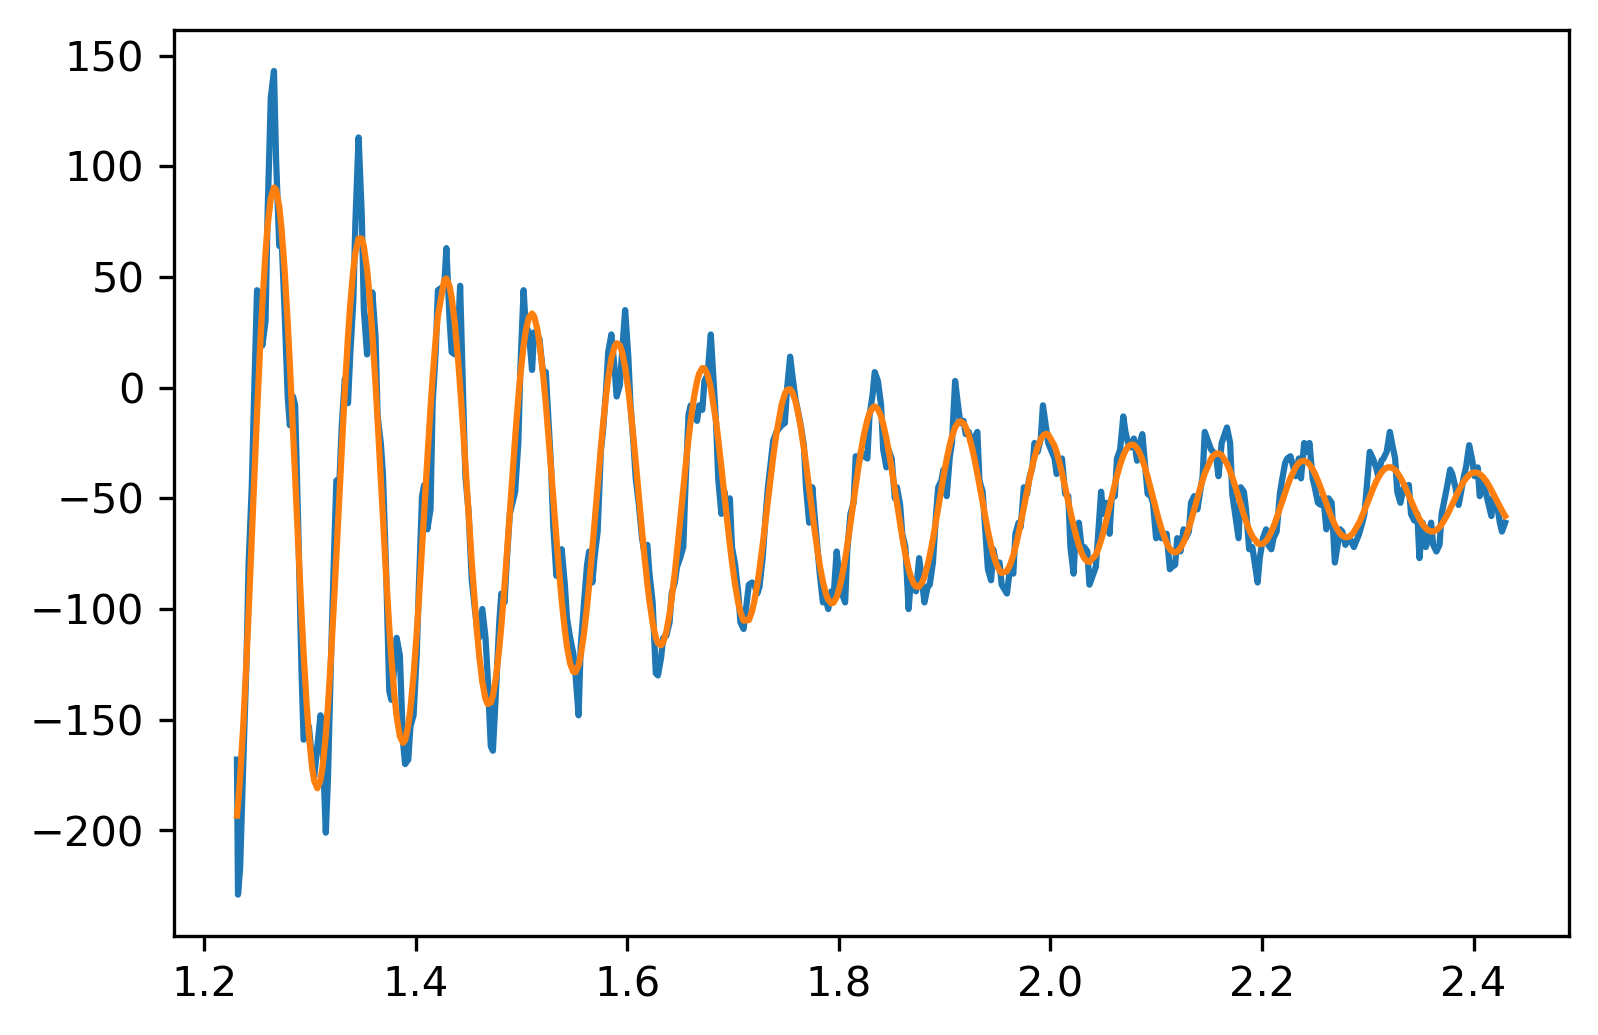

In [83]:
plt.figure(dpi=300)
plt.plot(t, y)
plt.plot(t, model(res.x, t))

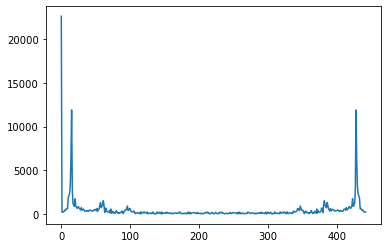

In [92]:
plt.plot(np.abs(np.fft.fft(y)))

In [59]:
res.x

array([ 5.89996089e+03,  1.13771399e+01, -1.80996347e+01, -5.92340642e+01,
        3.97499615e-01])

In [84]:
res.x

array([ 2.06545254e+03,  1.23344607e+01, -2.74804321e+01, -5.10713770e+01,
        4.72454866e-01])

In [88]:
np.diag(res.hess_inv) ** 0.5

array([0.07181407, 0.00106711, 0.00697522, 0.08319477, 0.00010755])

In [89]:
null_data = np.load(f"../data/norm_mode_null_test/NullTest_no_hit_take1.npy")

In [93]:
test_data = null_data[:, 2]
const_split = np.split(null_data, np.where(np.diff(test_data) != 0)[0] + 1)
clean_seg = np.concatenate([tmp[:1] for tmp in const_split], axis=0)

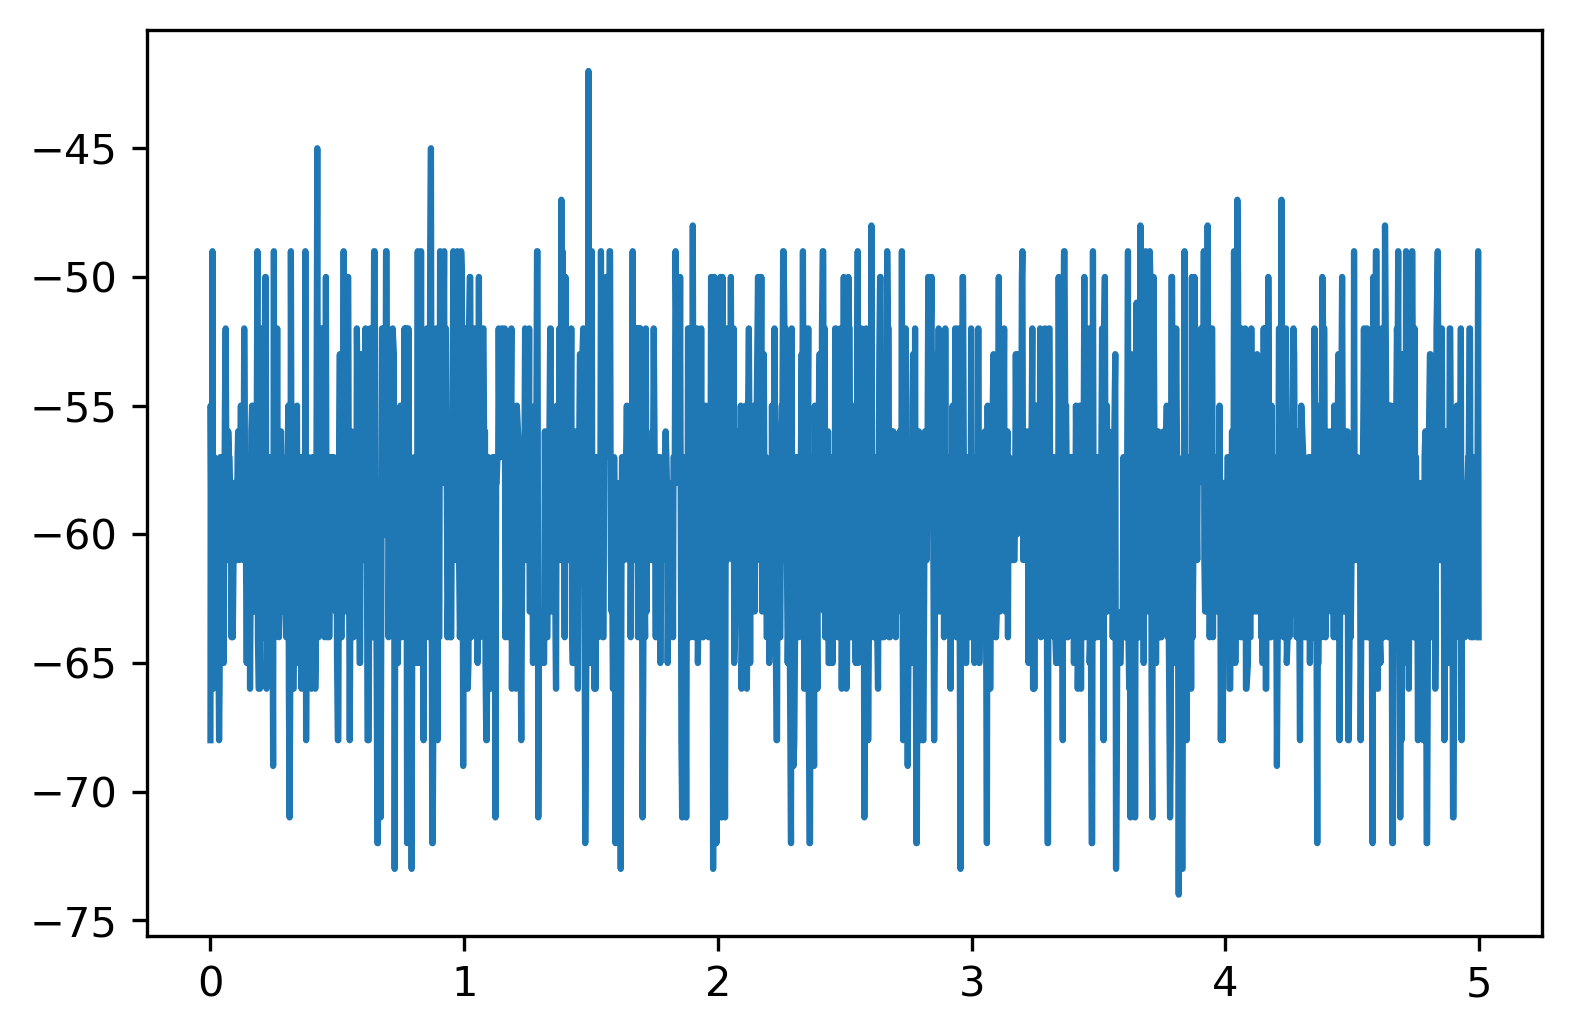

In [95]:
plt.figure(dpi=300)
plt.plot(clean_seg[:, 0], clean_seg[:, 1])
# plt.plot(t, model(res.x, t))

(0.0, 400000.0)

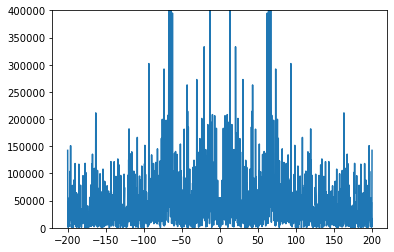

In [106]:
ps = np.abs(np.fft.fft(clean_seg[:, 1] - clean_seg[:, 1].mean()))**2
freqs = np.fft.fftfreq(clean_seg.shape[0], 1/400)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])
plt.ylim(0, 4e5)

(array([2.97420887e+05, 1.49394023e+05, 1.84761797e+01, 3.18216527e+01,
        3.67328893e+01, 4.03567240e+01, 3.29560709e+01, 2.13869962e+01,
        5.76798790e+01, 6.47455981e+01, 3.05064151e+01, 2.36198760e+01,
        2.87236189e+01, 5.36229494e+01, 4.36268188e+01, 3.05148888e+01,
        1.71469759e+01, 2.28592951e+01, 2.06109955e+01, 2.17998659e+01,
        1.05665629e+01, 1.47465850e+01, 2.31471039e+01, 1.77508953e+01,
        3.25094690e+00, 2.37671798e+01, 3.27783952e+01, 4.29195521e+01,
        1.72168496e+01, 1.54483995e+01, 2.17074440e+01, 2.03665955e+01,
        2.21851417e+01, 2.36010517e+01, 1.35971803e+01, 1.57584428e+01,
        3.52066799e+01, 5.56714229e+01, 4.74290503e+01, 4.26651913e+01,
        7.63664929e+01, 8.02467427e+01, 1.24776155e+02, 1.17421293e+02,
        5.40782066e+01, 2.14271371e+01, 2.54027300e+01, 5.07114297e+01,
        5.67439464e+01, 4.62388638e+01, 1.30875423e+01, 1.58087672e+01,
        1.93842477e+01, 2.46293766e+01, 2.41046547e+01, 1.747526

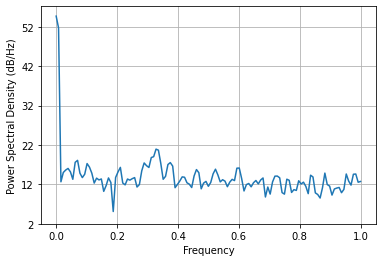

In [107]:
plt.psd(clean_seg[:, 1])